In [2]:
import os
import datetime

from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

Output hidden; open in https://colab.research.google.com to view.

In [3]:
data="/content/drive/MyDrive/P2M/Data/Data.csv"
df = pd.read_csv(data)
df.head()

,Mvt,Temp,Date,Time,TempExt
0,0.0,29.0,2021-08-10,00:00:04,36
1,1.0,30.0,2021-08-10,00:00:08,36
2,0.0,30.0,2021-08-10,00:00:12,36
3,1.0,29.0,2021-08-10,00:00:14,36
4,0.0,29.0,2021-08-10,00:00:21,36


In [4]:
df1=df.copy()
df1.head()

,Mvt,Temp,Date,Time,TempExt
0,0.0,29.0,2021-08-10,00:00:04,36
1,1.0,30.0,2021-08-10,00:00:08,36
2,0.0,30.0,2021-08-10,00:00:12,36
3,1.0,29.0,2021-08-10,00:00:14,36
4,0.0,29.0,2021-08-10,00:00:21,36


In [5]:
indexNames = df1[ df1['Temp'] <0 ].index
indexNames

Int64Index([505994], dtype='int64')

In [6]:
df1["marge"]= df1["Temp"]-df1["TempExt"]

In [7]:
df1.head

<bound method NDFrame.head of          Mvt  Temp        Date      Time  TempExt  marge
0        0.0  29.0  2021-08-10  00:00:04       36   -7.0
1        1.0  30.0  2021-08-10  00:00:08       36   -6.0
2        0.0  30.0  2021-08-10  00:00:12       36   -6.0
3        1.0  29.0  2021-08-10  00:00:14       36   -7.0
4        0.0  29.0  2021-08-10  00:00:21       36   -7.0
...      ...   ...         ...       ...      ...    ...
3722745  0.0  17.0  2021-12-31  23:59:53       10    7.0
3722746  1.0  17.0  2021-12-31  23:59:54       10    7.0
3722747  1.0  17.0  2021-12-31  23:59:56       10    7.0
3722748  0.0  17.0  2021-12-31  23:59:58       10    7.0
3722749  1.0  17.0  2021-12-31  23:59:59       10    7.0

[3722750 rows x 6 columns]>

In [8]:
pd.to_datetime(df1['Date'] + ' ' + df1['Time'])

0         2021-08-10 00:00:04
1         2021-08-10 00:00:08
2         2021-08-10 00:00:12
3         2021-08-10 00:00:14
4         2021-08-10 00:00:21
                  ...        
3722745   2021-12-31 23:59:53
3722746   2021-12-31 23:59:54
3722747   2021-12-31 23:59:56
3722748   2021-12-31 23:59:58
3722749   2021-12-31 23:59:59
Length: 3722750, dtype: datetime64[ns]

In [9]:
df1['DateTime']=pd.to_datetime(df1['Date'] + ' ' + df1['Time'])

In [10]:
df1['date'] = pd.to_datetime(df1['DateTime'], format='%d-%m-%Y %H:%M')
df1['hour'] = df1['date'].apply(lambda x : x.hour)
df1['year'] = df1['date'].apply(lambda x : x.year)
df1['month'] = df1['date'].apply(lambda x : x.month)
df1['day'] = df1['date'].apply(lambda x : x.day)
df1.head()

,Mvt,Temp,Date,Time,TempExt,marge,DateTime,date,hour,year,month,day
0,0.0,29.0,2021-08-10,00:00:04,36,-7.0,2021-08-10 00:00:04,2021-08-10 00:00:04,0,2021,8,10
1,1.0,30.0,2021-08-10,00:00:08,36,-6.0,2021-08-10 00:00:08,2021-08-10 00:00:08,0,2021,8,10
2,0.0,30.0,2021-08-10,00:00:12,36,-6.0,2021-08-10 00:00:12,2021-08-10 00:00:12,0,2021,8,10
3,1.0,29.0,2021-08-10,00:00:14,36,-7.0,2021-08-10 00:00:14,2021-08-10 00:00:14,0,2021,8,10
4,0.0,29.0,2021-08-10,00:00:21,36,-7.0,2021-08-10 00:00:21,2021-08-10 00:00:21,0,2021,8,10


In [11]:
df1 = df1.drop(columns="Mvt")
df1.head()

,Temp,Date,Time,TempExt,marge,DateTime,date,hour,year,month,day
0,29.0,2021-08-10,00:00:04,36,-7.0,2021-08-10 00:00:04,2021-08-10 00:00:04,0,2021,8,10
1,30.0,2021-08-10,00:00:08,36,-6.0,2021-08-10 00:00:08,2021-08-10 00:00:08,0,2021,8,10
2,30.0,2021-08-10,00:00:12,36,-6.0,2021-08-10 00:00:12,2021-08-10 00:00:12,0,2021,8,10
3,29.0,2021-08-10,00:00:14,36,-7.0,2021-08-10 00:00:14,2021-08-10 00:00:14,0,2021,8,10
4,29.0,2021-08-10,00:00:21,36,-7.0,2021-08-10 00:00:21,2021-08-10 00:00:21,0,2021,8,10


In [12]:
df1 = df1.drop(columns="Date")
df1 = df1.drop(columns="Time")

In [13]:
df1 = df1.drop(columns="date")

In [14]:
df1.head()

,Temp,TempExt,marge,DateTime,hour,year,month,day
0,29.0,36,-7.0,2021-08-10 00:00:04,0,2021,8,10
1,30.0,36,-6.0,2021-08-10 00:00:08,0,2021,8,10
2,30.0,36,-6.0,2021-08-10 00:00:12,0,2021,8,10
3,29.0,36,-7.0,2021-08-10 00:00:14,0,2021,8,10
4,29.0,36,-7.0,2021-08-10 00:00:21,0,2021,8,10


In [15]:
df_without_duplicates = df1.drop_duplicates(
    subset=['hour','day','month'], keep="last")

In [16]:
df_without_duplicates.head()

,Temp,TempExt,marge,DateTime,hour,year,month,day
1544,30.0,36,-6.0,2021-08-10 00:59:59,0,2021,8,10
3345,30.0,35,-5.0,2021-08-10 01:59:57,1,2021,8,10
4857,30.0,33,-3.0,2021-08-10 02:59:59,2,2021,8,10
6395,30.0,31,-1.0,2021-08-10 03:59:58,3,2021,8,10
8193,30.0,32,-2.0,2021-08-10 04:59:58,4,2021,8,10


In [17]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from scipy.stats import normaltest
df_without_duplicates_mm = minmax_scale(df_without_duplicates["marge"])
scaler = StandardScaler()
numpy_array = df_without_duplicates["marge"].to_numpy()
numpy_array = numpy_array.reshape(-1,1)
df_without_duplicates_ss = scaler.fit_transform(numpy_array)
print(df_without_duplicates_mm,'\n****************\n',df_without_duplicates_ss)

[0.81052632 0.81578947 0.82631579 ... 0.87894737 0.87894737 0.87894737] 
****************
 [[-1.43121762]
 [-1.26416356]
 [-0.93005546]
 ...
 [ 0.74048508]
 [ 0.74048508]
 [ 0.74048508]]


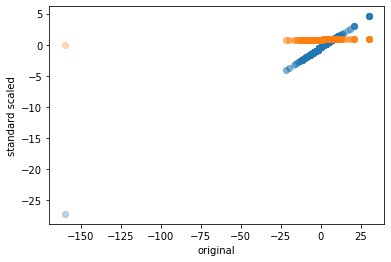

In [18]:
plt.scatter(df_without_duplicates["marge"], df_without_duplicates_ss, alpha=0.3)
plt.scatter(df_without_duplicates["marge"], df_without_duplicates_mm, alpha=0.3)

plt.ylabel("standard scaled")
plt.xlabel("original");

Text(0, 0.5, 'marge temperature')

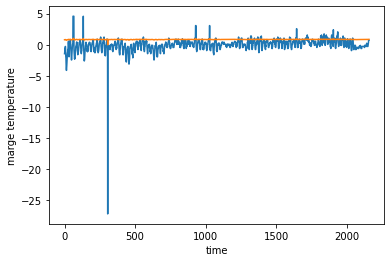

In [19]:
plt.plot(df_without_duplicates_ss)
plt.plot(df_without_duplicates_mm)
plt.xlabel('time')
plt.ylabel('marge temperature')

In [20]:
!pip install statsmodels==0.12.1

     |████████████████████████████████| 9.5 MB 4.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


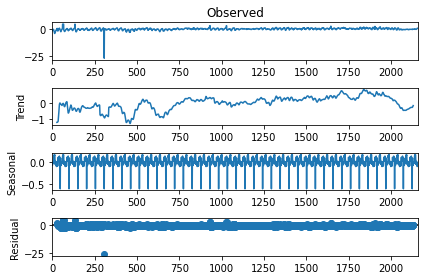

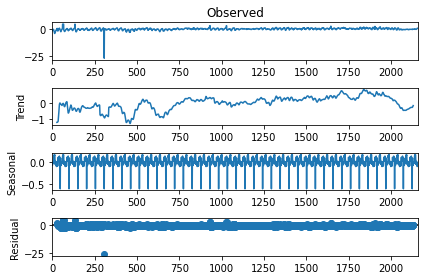

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_without_duplicates_ss, model='additive', period=52)
result.plot()

In [22]:
!pip install minisom
!pip install tslearn

  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=244833f6a3346c1a4dc595714fa1fb9d57bcfbca4bfd31150631975084aaeac2
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom
     |████████████████████████████████| 793 kB 4.3 MB/s 


In [23]:
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [24]:
df_without_duplicates = df_without_duplicates.drop(columns="Temp")

In [25]:
df_without_duplicates = df_without_duplicates.drop(columns="TempExt")

In [26]:
df_without_duplicates.head()

,marge,DateTime,hour,year,month,day
1544,-6.0,2021-08-10 00:59:59,0,2021,8,10
3345,-5.0,2021-08-10 01:59:57,1,2021,8,10
4857,-3.0,2021-08-10 02:59:59,2,2021,8,10
6395,-1.0,2021-08-10 03:59:58,3,2021,8,10
8193,-2.0,2021-08-10 04:59:58,4,2021,8,10


In [27]:
import math

In [46]:
km = TimeSeriesKMeans(n_clusters=2, metric="dtw")

labels = km.fit_predict(df_without_duplicates["marge"].values.reshape(-1, 1))
print(labels)
print (len(labels))
print (set(labels))

[0 0 0 ... 1 1 1]
2159
{0, 1}


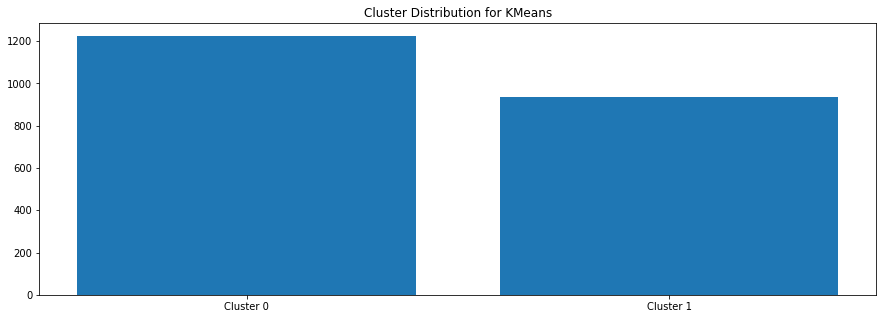

In [48]:
cluster_c = [len(labels[labels==i]) for i in range(2)]
cluster_n = ["Cluster "+str(i) for i in range(2)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

In [52]:
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
pd.DataFrame(zip(df_without_duplicates["DateTime"],fancy_names_for_labels),columns=["DateTime","Cluster"]).sort_values(by="Cluster").set_index("DateTime")

,Cluster
DateTime,
2021-08-10 00:59:59,Cluster 0
2021-10-25 12:59:56,Cluster 0
2021-10-25 11:59:58,Cluster 0
2021-10-25 10:59:57,Cluster 0
2021-10-25 09:59:59,Cluster 0
...,...
2021-11-12 00:02:19,Cluster 1
2021-11-11 22:55:10,Cluster 1
2021-11-11 21:59:59,Cluster 1


In [57]:
pca = PCA(n_components=1)

mySeries_transformed = pca.fit_transform(df_without_duplicates["marge"].values.reshape(-1, 1))

In [60]:
mySeries_transformed 

array([[ 8.56739231],
       [ 7.56739231],
       [ 5.56739231],
       ...,
       [-4.43260769],
       [-4.43260769],
       [-4.43260769]])

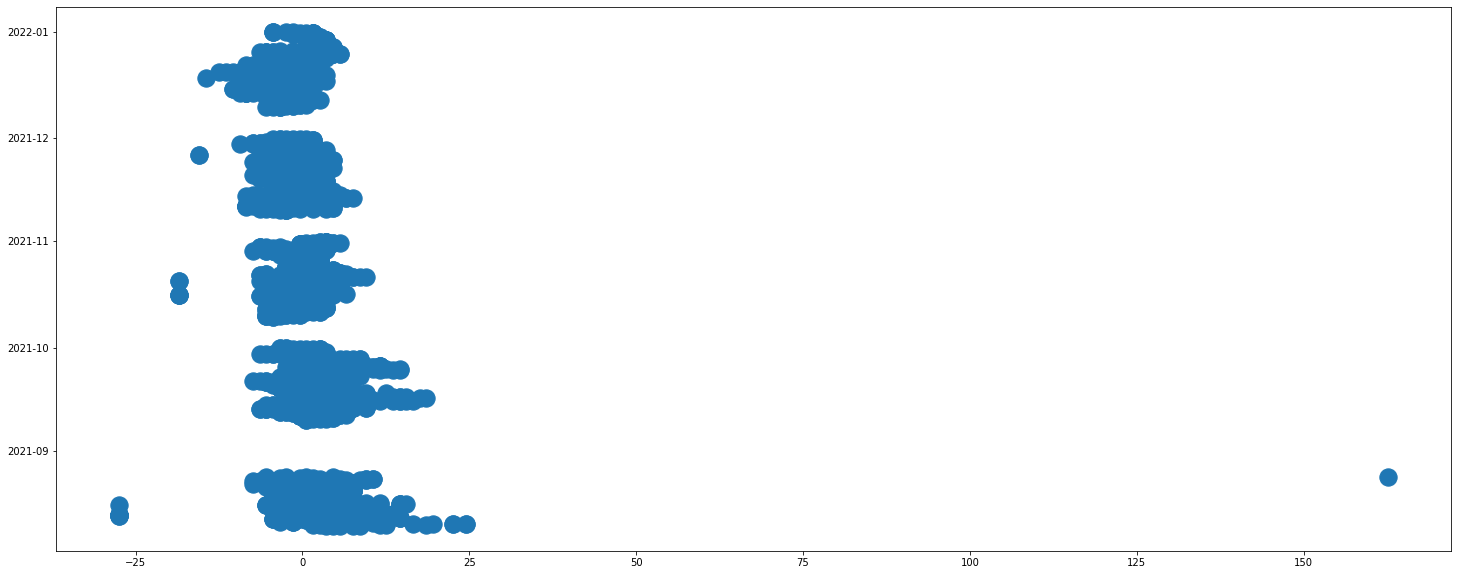

In [61]:
plt.figure(figsize=(25,10))
plt.scatter(mySeries_transformed[:,0],df_without_duplicates["DateTime"], s=300)
plt.show()

In [63]:
kmeans = KMeans(n_clusters=2,max_iter=5000)

labels = kmeans.fit_predict(mySeries_transformed)

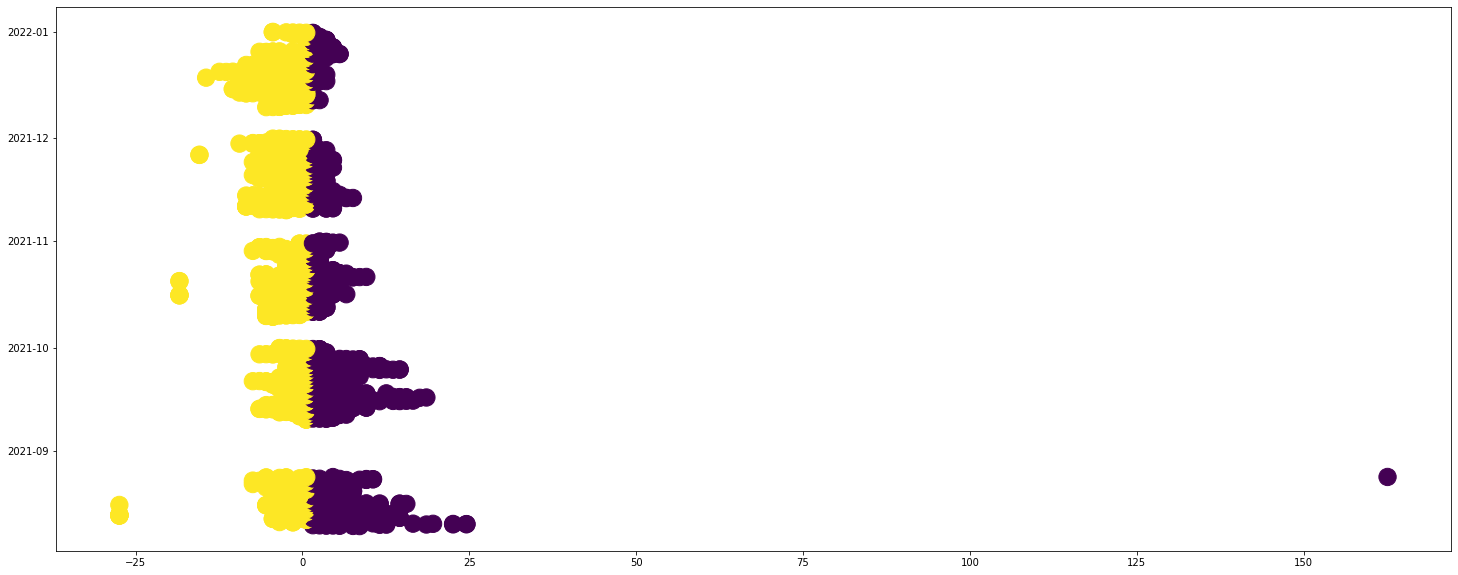

In [64]:
plt.figure(figsize=(25,10))
plt.scatter(mySeries_transformed[:, 0], df_without_duplicates["DateTime"], c=labels, s=300)
plt.show()

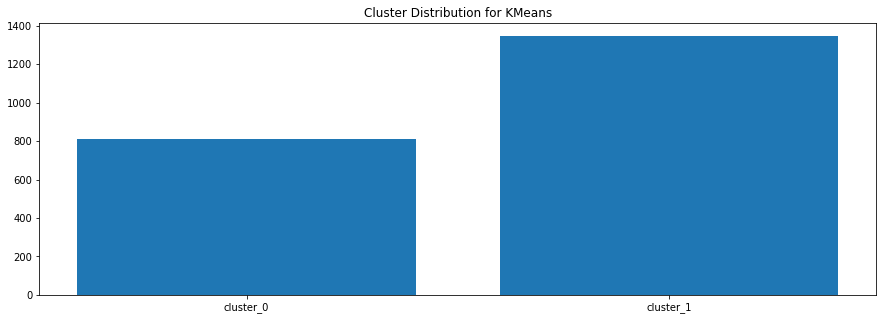

In [65]:
cluster_c = [len(labels[labels==i]) for i in range(2)]
cluster_n = ["cluster_"+str(i) for i in range(2)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

In [66]:
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
pd.DataFrame(zip(df_without_duplicates["DateTime"],fancy_names_for_labels),columns=["DateTime","Cluster"]).sort_values(by="Cluster").set_index("DateTime")

,Cluster
DateTime,
2021-08-10 00:59:59,Cluster 0
2021-10-15 17:59:59,Cluster 0
2021-10-16 10:59:59,Cluster 0
2021-10-16 11:59:58,Cluster 0
2021-10-16 12:59:59,Cluster 0
...,...
2021-10-25 03:59:59,Cluster 1
2021-10-25 02:59:58,Cluster 1
2021-10-25 01:01:17,Cluster 1
